In [1]:
import os 
import json

In [2]:
def list_of_files():
    directory = os.getcwd()+ "\\files"
    files = os.listdir(directory)
    json_files = list(filter(lambda x: x.endswith('.json'), files))
    files = [file[:-5] for file in json_files]
    return json_files, files 

companies_names, names_of_files = list_of_files()

In [3]:
def get_features(file_name):
    #поменяем директорию, если не находимся в папке с файлами о данных
    directory = os.getcwd()
    if not directory.endswith("files"):
        os.chdir(os.getcwd()+ "\\files")
        
    with open(file_name) as file:
        info_data = json.load(file)
        if info_data != 0:
            features = [info_data[i][1] for i in range(len(info_data) - 1)]
            return set(features)

In [4]:
file_features = {}
def dict_file_features():
    for name in names_of_files: 
        file_features[name] = get_features(name + ".json")
    return file_features

file_feature = dict_file_features()

In [17]:
def dict_feature_companies():
    features = []
    for company, data in file_feature.items():
        for feature in data:    
            if feature not in features: 
                features.append(feature)

    feature_company = {feature: [] for feature in features}

    for company, data in file_feature.items():
        for feature in data: 
            feature_company[feature].append(company)
    return feature_company

In [18]:
feature_company = dict_feature_companies()

In [25]:
print(feature_company.keys())

dict_keys(['Identifier_Cookie_or_similar_Tech_3rdParty', 'Demographic_3rdParty', 'Contact_E_Mail_Address_3rdParty', 'Identifier_IP_Address_3rdParty', 'Contact_City_3rdParty', 'Location_3rdParty', 'Identifier_Device_ID_3rdParty', 'Identifier_3rdParty', 'Identifier_Ad_ID_3rdParty', 'Contact_3rdParty', 'Contact_Postal_Address_3rdParty', 'Demographic_Age_3rdParty', 'Contact_Phone_Number_3rdParty', 'Contact_Address_Book_3rdParty', 'Contact_ZIP_3rdParty', 'Contact_Password_3rdParty'])


In [20]:
import networkx as nx

In [21]:
graph = nx.Graph()

In [23]:
graph.add_node('Identifier_Cookie_or_similar_Tech_3rdParty')
for company in list(feature_company['Identifier_Cookie_or_similar_Tech_3rdParty']):
    graph.add_node(company)
    graph.add_edge('Identifier_Cookie_or_similar_Tech_3rdParty', company)

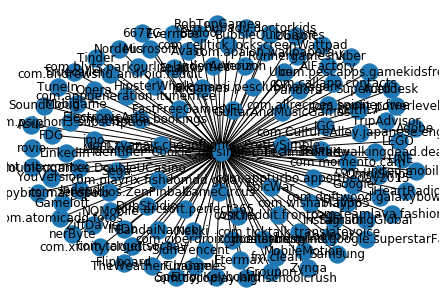

In [24]:
nx.draw(graph, with_labels = True)

In [ ]:
advertisment = ["advertisements", "targeting", "advertising", "ad",
              "adverts", "remarketing", "promote", "promotion", "announce", "announcement", 
               "publicize"]

analytics = ["analytics", "statistics", ]